In [1]:
import pandas as pd

import spotify
# import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()

In [9]:
target_bpm = 120.0
bpm_bandwidth = 10.0
query = {
    'seed_artists': ['spotify:artist:6U3cvMmHIab0CAGtC5tRY3',    # Erik Truffaz
                    ],
    'limit': 20,
    'country': 'CH',
}
track_attributes = {
    'min_tempo': target_bpm - (bpm_bandwidth / 2),
    'max_tempo': target_bpm + (bpm_bandwidth / 2),
    'min_danceability': 0.66,
#     'max_liveness': 0.33,
#     'max_speechiness': 0.33,
#     'max_instrumentalness': 0.33,
#     'max_acousticness': 0.33,
    'target_time_signature': 4,
    'min_valence': 0.5,
}
tracks = sp.recommendations(**query, **track_attributes)['tracks']
len(tracks)

1

In [4]:
tracklist = []
for track in tracks:
    tracklist.append({
        'id': track['id'],
        'name': track['name'],
        'artist_id': track['artists'][0]['id'],
        'artist_name': track['artists'][0]['name'],
        'popularity': track['popularity'],
    })
df = pd.DataFrame(tracklist)

In [5]:
audio_features = pd.DataFrame(sp.audio_features(list(df['id'])))
df = df.merge(audio_features, on='id')

In [6]:
df = df.drop(columns=['analysis_url', 'track_href', 'type', 'uri'])

<Axes: ylabel='Frequency'>

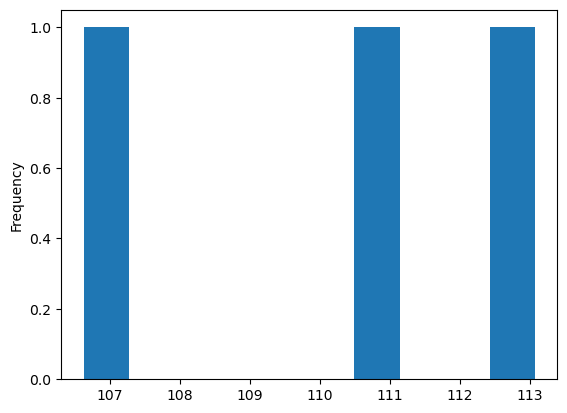

In [7]:
df['tempo'].plot.hist()

In [8]:
df

,id,name,artist_id,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,5WzRp0qBS9QbTNN4g6Pdr1,Le silence de l'exode - Chaos,2A8lfnul2PK2wGs1Rgsb95,Yom,25,0.671,0.214,9,-21.892,0,0.0619,0.832,0.881,0.110,0.588,110.973,116800,4
1,1wby58y1swER7rQdzELXt3,Rainfall,3zz8PxJE0tBfUqcZbf3SZS,Daniel Herskedal,22,0.674,0.419,9,-17.654,0,0.0595,0.791,0.853,0.104,0.513,106.634,217520,4
2,4lrEz8xF4B5yy2xzQ8jVty,Talking Drums,73WqPBltlyOTxKoOVWWBdL,Anne Paceo,27,0.662,0.589,5,-13.534,1,0.0754,0.803,0.959,0.110,0.531,113.073,76627,3


In [8]:
df_sorted = df.sort_values('tempo')
df_sorted['cum_mins'] = (df_sorted['duration_ms'].cumsum()) / 1000 / 60
df_sorted[['id', 'artist_name', 'name', 'tempo', 'duration_ms', 'cum_mins']]

,id,artist_name,name,tempo,duration_ms,cum_mins
16,1SwUqH8LELoY6SwldhOwr8,Rufus Thomas,(Do The) Push And Pull - Pt. 1,105.096,198439,3.307317
4,2u0TWxcEOhIwSzyIAwxdIs,Bettye Swann,Make Me Yours,107.941,195293,6.562200
6,2KspovcUjbmnrKZ58KHqR7,James Hunter,People Gonna Talk,109.470,195400,9.818867
17,7H3gr3Y006302HMoAVQHYQ,Dr. John,Cold Cold Cold,109.687,157000,12.435533
7,7mRak6wBx9OGKXr3zStoHW,Wilson Pickett,Mustang Sally,109.741,187827,15.565983
13,1aykpQ3QYytGydJxP7qyVn,Wilson Pickett,Something You Got,109.890,178240,18.536650
5,4lzTyLYXb3ED01TSLCJ1Hz,The Staple Singers,Respect Yourself,109.964,211680,22.064650
11,4inbFqrP4CS3Ig99dIwfQ1,Sharon Jones & The Dap-Kings,Tell Me,110.509,166767,24.844100
1,4NRQwaks9r58tTDvr4iEyv,Wilson Pickett,In the Midnight Hour,111.919,157160,27.463433
14,5Xwt15HIJogVrerl0bzkGb,Keb' Mo',She Just Wants To Dance,112.133,208427,30.937217


In [9]:
seed_artist_names = [item['name'] for item in sp.artists(query['seed_artists'])['artists']]
seed_title = ', '.join(seed_artist_names)


In [10]:
playlist_name = (str(target_bpm) + " BPM like " + seed_title)
playlist_name

'110.0 BPM like James Hunter'

In [11]:
playlist = sp.user_playlist_create(
    user['id'], 
    playlist_name, 
    public=False, 
    description="Created with BPMPlaylist.py"
)
sp.user_playlist_add_tracks(user['id'], playlist['id'], list(df_sorted['id']))
sp.user_playlist(user['id'], playlist['id'], fields="tracks")['tracks']['total']

20